In [1]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import lmdiag



In [2]:
df = pd.read_csv('bank_oversample_new.csv')
pd.set_option('display.max_columns',None)
df.sample(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
2578,42,0,29,82,12,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2898,42,0,30,115,6,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
346,57,1602,29,339,3,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4283,46,5,29,305,2,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
964,53,255,19,126,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [3]:
df.shape

(8000, 43)

count    8000.000000
mean        0.500000
std         0.500031
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: result, dtype: float64


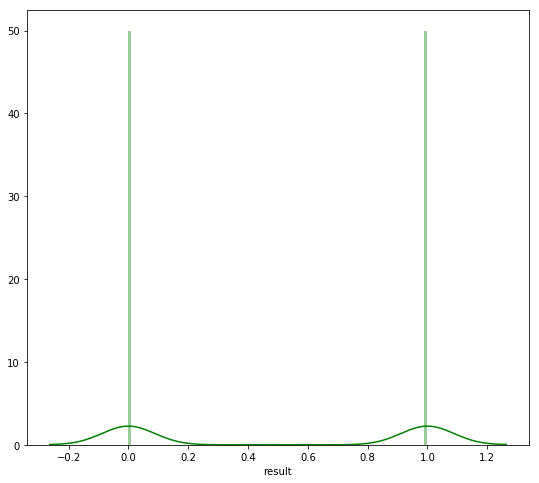

In [4]:
print(df['result'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['result'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [5]:
X = df.drop('result',axis = 1)

In [6]:
y = df['result']

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(6400, 42) (1600, 42) (6400,) (1600,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=20, criterion='gini',
                              max_features = 0.2)

In [10]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [19]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*30)
cr = classification_report(y_test,y_pred)
print(cr)
print('-'*30)
kappa_score = cohen_kappa_score(y_test,y_pred)
print('Kappa Score = ', kappa_score)
print('-'*30)
auc_score = roc_auc_score(y_test,y_pred)
print('Auc Score = ',auc_score)


[[735  36]
 [ 62 767]]
------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       771
           1       0.96      0.93      0.94       829

   micro avg       0.94      0.94      0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

------------------------------
Kappa Score =  0.8774833453922642
------------------------------
Auc Score =  0.9392592453520955


In [14]:
fpr, tpr, thresh = roc_curve(y_test,y_pred)

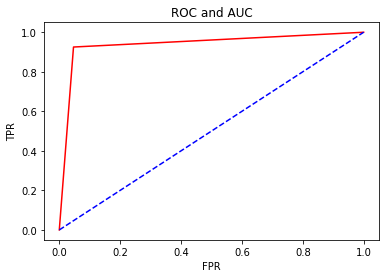

In [15]:
# ROC and AUC
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show()

In [16]:
import innomatics

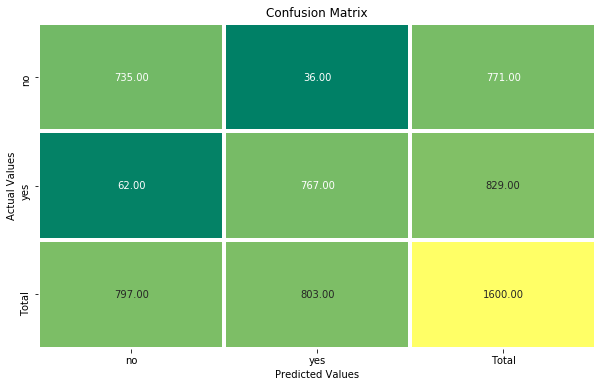

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       771
           1       0.96      0.93      0.94       829

   micro avg       0.94      0.94      0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600


************************************Kappa Score************************************


Kappa Score = 0.8774833453922642

******************************Area Under Curve Score******************************


AUC Score = 0.9392592453520955
Number of probabilities to build ROC = 22


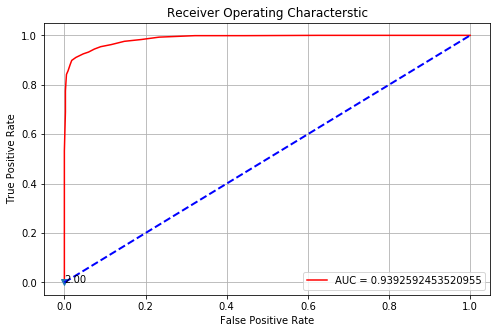

In [22]:
innomatics.classification_metric(y_test,y_pred,y_prob[:,1],n=50,
                                label = ['no','yes'], verbose = True)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
model_tune = RandomForestClassifier()

In [25]:
tuned_parameter = [{'n_estimators':[10,20,30],
                   'criterion':['gini','entropy'],
                   'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [26]:
clf = GridSearchCV(model_tune,param_grid = tuned_parameter,cv = 10,
                   scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 20, 30], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15], 'max_features': ['sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)